In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

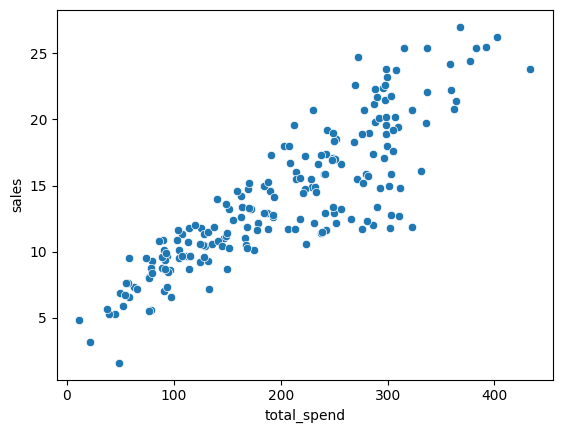

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [8]:
X = df['total_spend']

y = df['sales']

In [9]:
#y=mx+b
#y=B1x+B0
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.

    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.

    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.

    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.

    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, sh

In [10]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [11]:
potential_spend=np.linspace(0,500,100)

In [12]:
predicted_sales=0.04868788*potential_spend+4.24302822

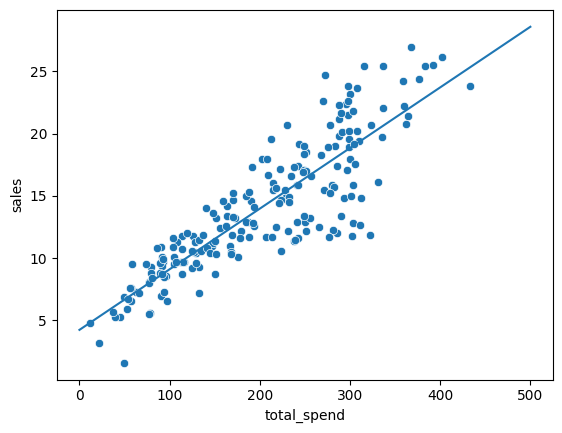

In [13]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales)

In [14]:
spend=200
predicted_sales=0.04868788*spend+4.2430282

In [15]:
predicted_sales

13.980604200000002

In [16]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
#y=b1x + b0 
#y= b3x**3 + b2*x**2 + b1x + b0

In [18]:
pot_spend=np.linspace(0,500,100)

In [19]:
pred_sales = 3.07615033e-07 * pot_spend**3 + -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

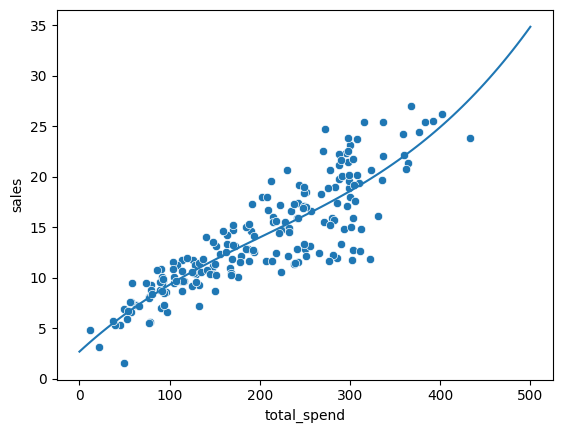

In [20]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(pot_spend,pred_sales)

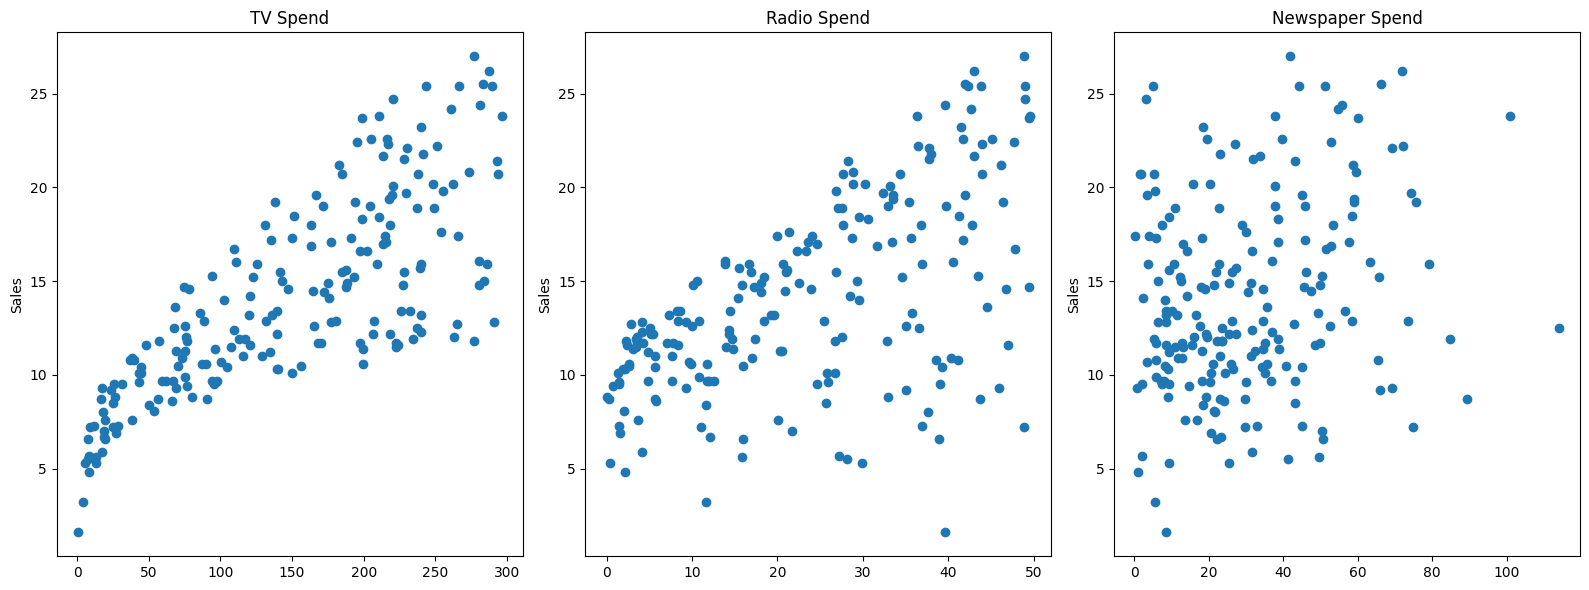

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

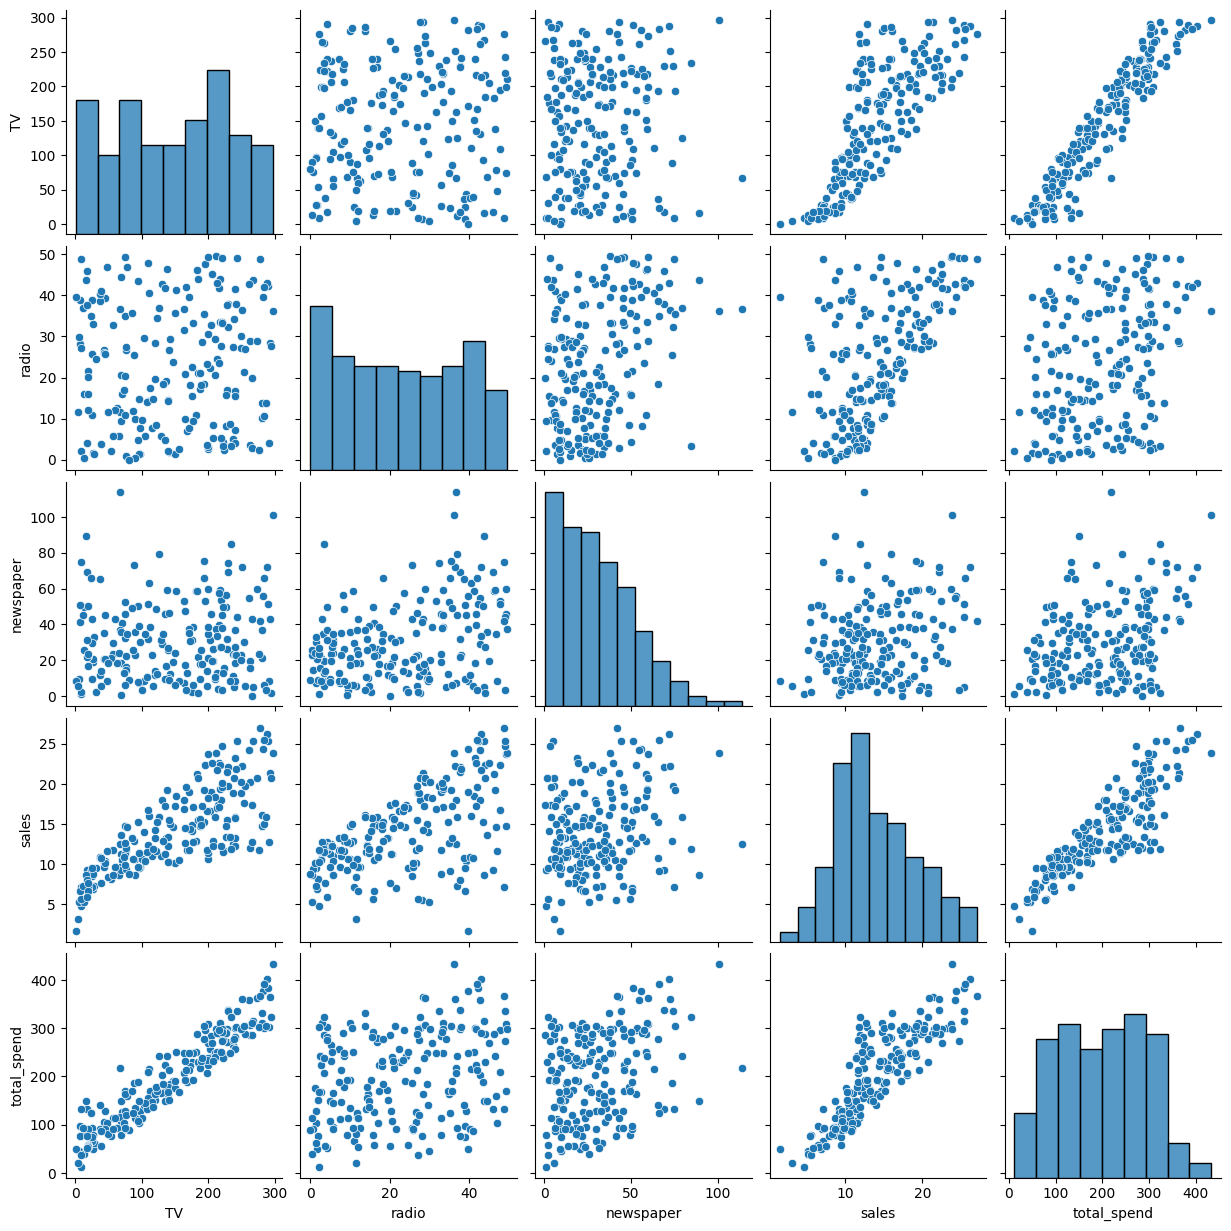

In [22]:
sns.pairplot(df)

In [23]:
x=df.drop('sales',axis=1)

In [24]:
x


,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0
...,...,...,...,...
195,38.2,3.7,13.8,55.7
196,94.2,4.9,8.1,107.2
197,177.0,9.3,6.4,192.7
198,283.6,42.0,66.2,391.8


In [25]:
y=df['sales']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None
)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
len(X_test)

60

In [30]:
X_train

85     277.3
183    402.4
127     89.4
53     287.5
100    276.5
       ...  
63     140.7
70     268.4
81     280.8
11     242.7
95     247.8
Name: total_spend, Length: 140, dtype: float64

In [31]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [32]:
X_test

37     169.8
109    287.8
31     168.9
89     209.0
66      58.3
119     57.7
54     307.4
74     251.1
145    151.2
142    291.6
148     90.2
112    193.5
174    238.9
55     308.3
141    304.7
149     91.1
25     285.9
34     104.5
170     80.0
39     297.7
172     56.7
153    248.7
175    367.6
61     358.7
65      79.2
50     237.5
42     323.1
129    114.7
179    193.2
2      132.4
12     124.8
133    298.4
90     148.5
22      78.7
41     249.1
32     128.7
125    124.9
196    107.2
158     93.8
180    167.5
16     218.4
186    168.2
144    149.9
121     90.9
80     125.4
18     108.0
78      44.7
48     292.9
4      250.0
15     296.0
1      128.9
43     241.7
102    311.7
164    137.3
9      223.6
155     21.4
36     315.7
190     86.4
33     285.9
45     229.1
Name: total_spend, dtype: float64

In [33]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Ensure X_train is a NumPy array
X_train = np.array(X_train).reshape(-1, 1)  # Convert from (n_samples,) to (n_samples, 1)

# Ensure y_train is a NumPy array (typically fine as 1D)
y_train = np.array(y_train)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Now it's safe to predict
y_pred = model.predict(X_train)
print(y_pred)


[17.68169815 23.60987946  8.77757929 18.16505106 17.64378811 21.58643148
 14.89057201 12.09944588 15.99944046 14.15132638 19.83309249  8.95765194
 18.92799046  8.9007869   9.86275397 18.64840397 12.63492509 20.48704054
  8.18049628 16.35958577 20.2548416  13.2936119   8.88183188 17.32155284
 14.60624677 17.79542824  7.04793406 15.50661004 17.70539192 13.67271222
  7.53128698 17.14621894  9.45995987 10.57830583 14.35035405 14.6962831
 10.9526674  12.27477978 12.69179013 10.61147711 12.31268981 22.70003868
 11.49762411 11.22751513 17.40211166 17.61535559  6.393986   15.68194394
 25.08837072 14.6441568  13.41208075  9.93383528  9.92435777 18.70526902
 15.81936781 18.18400608 17.95180713 19.28339702 18.29773617 16.44962209
 16.44962209 15.02799588 18.9137742  10.81050478 15.95679167 15.46396125
 12.60175381 23.10757153 19.24074823 18.66735899  6.86312265 18.75265656
  8.19471254 13.29835065 16.00891797 10.21816052 14.38352533 18.73370155
 12.98085413  9.09507581 21.80915292 15.5729526  20.

In [37]:
import numpy as np

# Ensure X_test is a NumPy array and reshape it to 2D
X_test = np.array(X_test).reshape(-1, 1)

# Now it's safe to make predictions
test_predictions = model.predict(X_test)
print(test_predictions)


[12.58753755 18.17926732 12.54488876 14.44512913  7.30382678  7.27539426
 19.10806312 16.44014459 11.70612929 18.35933998  8.81548932 13.71062225
 15.86201659 19.1507119  18.98011676  8.85813811 18.089231    9.49313115
  8.33213641 18.64840397  7.22800672 16.32641449 21.96079305 21.53904394
  8.29422638 15.79567404 19.8520475   9.97648406 13.69640599 10.81524353
 10.45509822 18.68157525 11.57818293  8.27053261 16.34536951 10.63990963
 10.45983698  9.62107751  8.98608447 12.4785462  14.89057201 12.51171748
 11.64452549  8.8486606  10.48353075  9.65898754  6.65935623 18.42094378
 16.38801829 18.56784515 10.64938714 15.99470171 19.31182954 11.04744248
 15.13698722  5.55522654 19.5013797   8.63541667 18.089231   15.3976187 ]


In [38]:
test_predictions

array([12.58753755, 18.17926732, 12.54488876, 14.44512913,  7.30382678,
        7.27539426, 19.10806312, 16.44014459, 11.70612929, 18.35933998,
        8.81548932, 13.71062225, 15.86201659, 19.1507119 , 18.98011676,
        8.85813811, 18.089231  ,  9.49313115,  8.33213641, 18.64840397,
        7.22800672, 16.32641449, 21.96079305, 21.53904394,  8.29422638,
       15.79567404, 19.8520475 ,  9.97648406, 13.69640599, 10.81524353,
       10.45509822, 18.68157525, 11.57818293,  8.27053261, 16.34536951,
       10.63990963, 10.45983698,  9.62107751,  8.98608447, 12.4785462 ,
       14.89057201, 12.51171748, 11.64452549,  8.8486606 , 10.48353075,
        9.65898754,  6.65935623, 18.42094378, 16.38801829, 18.56784515,
       10.64938714, 15.99470171, 19.31182954, 11.04744248, 15.13698722,
        5.55522654, 19.5013797 ,  8.63541667, 18.089231  , 15.3976187 ])

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [41]:
mean_absolute_error(y_test,test_predictions)

1.895892422456892

In [42]:
mean_squared_error(y_test, test_predictions)

5.921660160912178

In [43]:
np.sqrt(mean_squared_error(y_test, test_predictions))

np.float64(2.4334461491703854)

In [44]:
test_residuals=y_test - test_predictions

In [45]:
test_residuals

37     2.112462
109    1.620733
31    -0.644889
89     2.254871
66     2.196173
119   -0.675394
54     1.091937
74     0.559855
145   -1.406129
142    1.740660
148    2.084511
112    0.389378
174   -4.362017
55     4.549288
141    0.219883
149    1.241862
25    -6.089231
34     0.006869
170    0.067864
39     2.851596
172    0.371993
153    2.673586
175    5.039207
61     2.660956
65     1.005774
50    -4.395674
42     0.847952
129   -0.276484
179   -1.096406
2     -1.515244
12    -1.255098
133    0.918425
90    -0.378183
22    -2.670533
41     0.754630
32    -1.039910
125    0.140163
196    0.078922
158   -1.686084
180   -1.978546
16    -2.390572
186   -2.211717
144   -0.244525
121   -1.848661
80     1.316469
18     1.641012
78    -1.359356
48    -3.620944
4     -3.488018
15     3.832155
1     -0.249387
43    -3.094702
102   -4.511830
164    0.852558
9     -4.536987
155   -2.355227
36     5.898620
190    2.164583
33    -0.689231
45    -0.497619
Name: sales, dtype: float64

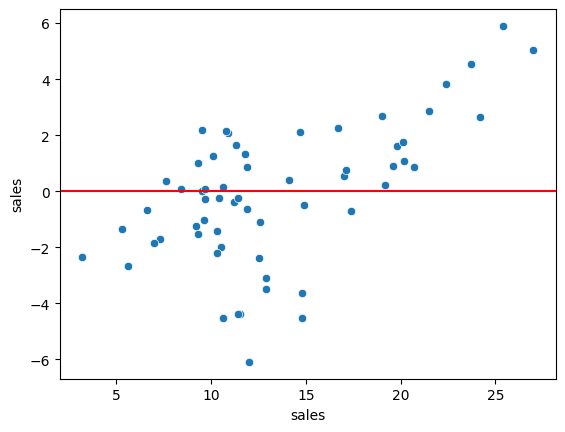

In [47]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r')

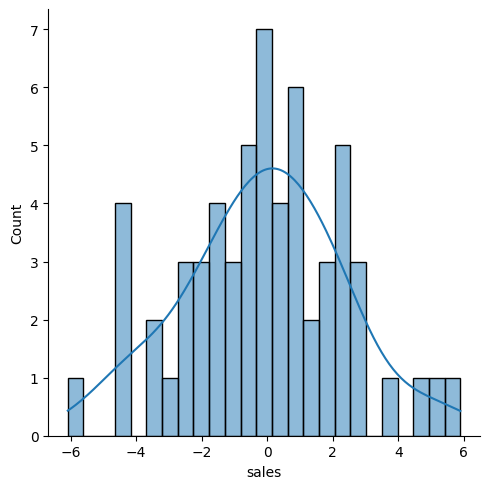

In [49]:
sns.displot(test_residuals,bins=25,kde=True)

In [50]:
final_model=LinearRegression()

In [59]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Convert to DataFrame

y = y.ravel()  # Ensure y is 1D
final_model.fit(X, y)


C:\Users\aashi\AppData\Local\Temp\ipykernel_24012\1197807774.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()  # Ensure y is 1D


LinearRegression()

In [60]:
final_model.coef_

array([0.04868788])

In [61]:
X.head()

,total_spend
0,337.1
1,128.9
2,132.4
3,251.3
4,250.0


In [64]:
X.shape


(200, 1)